In [1]:
import numpy as np
import h5py as h5

import matplotlib.pyplot as plt

In [2]:
# old file
h5f = '/home3/ivkhar/TA/data/mass_spectrum/old_1223/hadrons/bundled/mc_hadrons_qgs34_0010.h5'

In [3]:
with h5.File(h5f,'r') as hf:
    print( hf['pr-q4-9yr/dt'].shape )

(268322, 6, 6, 7)


In [24]:
num = 64

with h5.File(h5f,'r') as hf:
    times_flat = hf['pr-q4-9yr/dt'][:num,:,:,4:5]*1e6 # in mks
    times_diff = hf['pr-q4-9yr/dt'][:num,:,:,5:6]*1e6 # in mks
    mask_in = hf['pr-q4-9yr/dt'][:num,:,:,6:7]
    real_coords = hf['pr-q4-9yr/dt'][:num,:,:,:3]*1.2 # in km
    qs_in = hf['pr-q4-9yr/dt'][:num,:,:,3:4]
    ev_params = hf['pr-q3-9yr/ev_params'][:num]
    
mask_qs = np.where( np.logical_and(mask_in>0, qs_in>0), 1., 0. )

KeyError: 'Unable to open object (component not found)'

In [25]:
# set c=1, time in mks, distance in km
time2dist = np.array([0.299792458], dtype=np.float32)

times_flat *= time2dist
times_diff *= time2dist

times_reg = times_flat + times_diff

In [6]:
theta_rub = ev_params[:num,2]/180*3.1415
phi_rub = ev_params[:num,3]/180*3.1415

In [7]:
nx = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.cos(phi_rub)[:,np.newaxis,np.newaxis]
ny = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.sin(phi_rub)[:,np.newaxis,np.newaxis]
nz = - np.cos(theta_rub)[:,np.newaxis,np.newaxis]
a = np.concatenate((nx,ny,nz), axis=-1)
a = np.expand_dims( a, axis=1 )

t_rec = np.sum( a*real_coords[:,:,:,:3], axis=-1 )
t_rec = t_rec*mask_in[:,:,:,0]

In [8]:
print(t_rec[:5]-times_flat[:5,:,:,0])

[[[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.35387266  0.40533757
    0.        ]
  [ 0.          0.          0.05173676  0.08961448  0.1273849
    0.        ]
  [ 0.          0.          0.         -0.16872704  0.
    0.        ]
  [ 0.          0.         -0.49108326  0.          0.
    0.        ]]

 [[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.4209404   0.
    0.        ]
  [ 0.          0.          0.10297143  0.06480929  0.00914842
    0.        ]
  [ 0.          0.         -0.2411322  -0.2954021  -0.35019392
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]]

 [[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.

In [26]:
# new file
h5f = '/home3/ivkhar/TA/data/MC/bundled/pr_q3_14yr_1745_0010_excl_sat_T_excl_geo_T_bundled.h5'

In [27]:
with h5.File(h5f,'r') as hf:
    print(hf['recos'].shape)

(173044, 15)


In [28]:
with h5.File(h5f,'r') as hf:
    print(hf['dt_bunlde'][0,:,:,-3])
    print(hf['dt_bunlde'][0,:,:,-2])

[[ 0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -2.313 -4.545  0.   ]
 [ 0.     0.     1.186 -1.155 -3.481  0.   ]
 [ 0.     0.     2.256 -0.297  0.     0.   ]
 [ 0.     0.     3.27   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]]
[[0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.286 2.098 0.   ]
 [0.    0.    0.487 0.288 0.734 0.   ]
 [0.    0.    0.397 0.49  0.    0.   ]
 [0.    0.    0.583 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]


In [31]:
num = 640

with h5.File(h5f,'r') as hf:
    times_flat = hf['dt_bunlde'][:num,:,:,4:5] # in mks
    times_diff = hf['dt_bunlde'][:num,:,:,5:6] # in mks
    mask_in = hf['dt_bunlde'][:num,:,:,6:7]
    real_coords = hf['dt_bunlde'][:num,:,:,:3]*1.2 # in km
    qs_in = hf['dt_bunlde'][:num,:,:,3:4]
    ev_params = hf['recos'][:num,:2]
    
mask_qs = np.where( np.logical_and(mask_in>0, qs_in>0), 1., 0. )

In [32]:
times_flat[0,:,:,0]

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -2.313, -4.545,  0.   ],
       [ 0.   ,  0.   ,  1.186, -1.155, -3.481,  0.   ],
       [ 0.   ,  0.   ,  2.256, -0.297,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  3.27 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]], dtype=float32)

In [21]:
# set c=1, time in mks, distance in km
time2dist = np.array([0.299792458], dtype=np.float32)

times_flat *= time2dist
times_diff *= time2dist

times_reg = times_flat + times_diff

In [22]:
theta_rub = ev_params[:num,0]/180*3.1415
phi_rub = ev_params[:num,1]/180*3.1415

In [23]:
nx = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.cos(phi_rub)[:,np.newaxis,np.newaxis]
ny = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.sin(phi_rub)[:,np.newaxis,np.newaxis]
nz = - np.cos(theta_rub)[:,np.newaxis,np.newaxis]
a = np.concatenate((nx,ny,nz), axis=-1)
a = np.expand_dims( a, axis=1 )

t_rec = np.sum( a*real_coords[:,:,:,:3], axis=-1 )
t_rec = t_rec*mask_in[:,:,:,0]

In [36]:
t_rec[0]/time2dist

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , -2.3123114, -4.544444 ,
         0.       ],
       [ 0.       ,  0.       ,  1.1856357, -1.1551101, -3.480965 ,
         0.       ],
       [ 0.       ,  0.       ,  2.256193 , -0.2973976,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  3.269307 ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [34]:
times_flat[0,:,:,0]

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -2.313, -4.545,  0.   ],
       [ 0.   ,  0.   ,  1.186, -1.155, -3.481,  0.   ],
       [ 0.   ,  0.   ,  2.256, -0.297,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  3.27 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]], dtype=float32)

In [11]:
# first is bug
print(t_rec[:5]-times_flat[:5,:,:,0])

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.06470490e-04
    1.66654587e-04  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00 -1.09225512e-04 -3.30209732e-05
    1.04904175e-05  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  5.78165054e-05 -1.19209290e-04
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00 -2.07781792e-04  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   -0.00000000e+00 -0.00000000e+00]
  [-0.00000000e+00 -0.00000000e+00  1.08480453e-04  1.12771988e-04
   -0.00000000e+00 -0.00000000e+00]
  [-0.00000000e+00 -0.00000000e+00  9.44733620e-06  6.66081905e-05
   -0.00000000e+00 -0.00000000e+00]
  [-0.00000000e+00 -0.00000000e+00  1.27285719e-04 -1.20699406e-04
   -

In [12]:
print(np.amax(t_rec[:25]-times_flat[:25,:,:,0]))

0.00024694204


In [13]:
nx = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.cos(phi_rub)[:,np.newaxis,np.newaxis]
ny = - np.sin(theta_rub)[:,np.newaxis,np.newaxis] * np.sin(phi_rub)[:,np.newaxis,np.newaxis]
a = np.concatenate((nx,ny), axis=-1)
a = np.expand_dims( a, axis=1 )

t_rec = np.sum( a*real_coords[:,:,:,:2], axis=-1 )
t_rec = t_rec*mask_in[:,:,:,0]

In [14]:
# first is bug
print(np.amax(t_rec[:25]-times_flat[:25,:,:,0]))

0.06258309


In [16]:
t_rec[0,:,:]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , -0.64871275, -1.3180323 ,
         0.        ],
       [ 0.        ,  0.        ,  0.37349838, -0.31838965, -1.0108697 ,
         0.        ],
       [ 0.        ,  0.        ,  0.6887644 , -0.06813286,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.98660135,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]], dtype=float32)

In [17]:
times_flat[0,:,:,0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , -0.69342   , -1.3625568 ,
         0.        ],
       [ 0.        ,  0.        ,  0.35555387, -0.34626028, -1.0435776 ,
         0.        ],
       [ 0.        ,  0.        ,  0.6763318 , -0.08903836,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.98032135,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]], dtype=float32)

In [19]:
print(times_flat[:10,:,:,0])

tf.Tensor(
[[[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.         -1.0771543  -1.6716429
    0.        ]
  [ 0.          0.          0.09743255 -0.5138443  -1.1236222
    0.        ]
  [ 0.          0.          0.         -0.03747406  0.
    0.        ]
  [ 0.          0.          1.1667924   0.          0.
    0.        ]]

 [[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.         -0.49915445  0.
    0.        ]
  [ 0.          0.         -0.6946192  -0.18587133  0.533031
    0.        ]
  [ 0.          0.         -0.56720734  0.14749789  0.8604044
    0.        ]
  [ 0.          0.          0.          0.          0.
    0.        ]]

 [[ 0.          0.          0.          0.          0.
    0.        ]
  [ 0.          0.          0.     

In [153]:
print( np.nonzero(np.abs(times_flat[mask_qs.numpy().astype(bool)])<1e-3)[0][:500] )

[    0     1     2     3     4     5     6   587   588   589   590   591
   592   593   631   632   633   634   635   636   637   638   639  1029
  1030  1031  1032  1033  1034  1035  1036  1202  1203  1204  1205  1206
  1207  1208  1209  1579  1580  1581  1582  1583  1584  2200  2201  2202
  2203  2204  2205  2206  2241  2242  2243  2244  2245  2246  2407  2408
  2409  2410  2411  2412  2413  2595  2596  2597  2598  2599  2600  2601
  2646  2647  2648  2649  2650  2651  2652  2989  2990  2991  2992  2993
  2994  3183  3184  3185  3186  3187  3188  3189  3316  3317  3318  3319
  3320  3321  3322  3344  3345  3346  3347  3348  3349  3350  3381  3382
  3383  3384  3385  3386  3387  3388  3498  3499  3500  3501  3502  3503
  3504  3570  3571  3572  3573  3574  3575  3576  3693  3694  3695  3696
  3697  4224  4225  4226  4227  4228  4229  4321  4322  4323  4324  4325
  4326  4327  4394  4395  4396  4397  4398  4399  4400  5311  5312  5313
  5314  5315  5316  5317  5318  5319  5685  5686  5

In [147]:
mask_qs.numpy().astype(bool)

array([[[[False],
         [False],
         [False],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         [ True],
         [False],
         [False]],

        [[False],
         [False],
         [ True],
         [ True],
         [False],
         [False]],

        [[ True],
         [ True],
         [ True],
         [False],
         [False],
         [False]],

        [[False],
         [ True],
         [False],
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [ True],
         [ True],
         [False],
         [False]],

        

In [15]:
h5f = '/home3/ivkhar/TA/data/MC/h5s/pr_q3_14yr_1745.h5'

In [16]:
num = 500000


with h5.File(h5f,'r') as hf:
    times_flat = hf['dt_params'][:,4] # in mks
    #times_diff = hf['dt_params'][:num,5] # in mks
    #ev_params = hf['reco_rubtsov'][:num,:2]

In [18]:
#print(times_flat[:1000])
print( np.nonzero( np.abs(times_flat)<1e-4 )[0][:100] )

[  4620   5124  16435  23650  30243  30638  33618  33619  34541  37302
  37392  38784  38785  39189  40883  44240  46453  48532  48533  50034
  50035  53795  58457  62120  68003  68004  76178  78352  83708  84551
  87362  90198  91403  97253 103130 103131 113557 116109 123799 123983
 131840 138075 140434 144031 144032 147528 156763 163629 167222 168197
 171641 172843 172954 175430 177042 177043 178175 179548 180103 187117
 187118 199469 204213 204406 208591 211685 215986 216041 219343 222978
 223898 226373 229240 230117 231736 236682 248708 249173 250434 256368
 256369 258599 268116 268292 274939 286459 289882 291122 292446 299792
 299891 310433 311911 312043 317881 317882 326775 329306 340100 341887]


In [19]:
print( times_flat[33617] )
print( times_flat[33618] )
print( times_flat[33619] )
print( times_flat[33620] )

-0.16
-0.0
-0.0
0.278


In [23]:
times_flat[-10:]

array([-1.624e-06,  2.730e-07,  1.806e-06, -2.328e-06, -3.020e-07,
        1.407e-06, -2.154e-06, -1.668e-06, -1.970e-07,  1.692e-06],
      dtype=float32)

In [2]:
h5f = '/home3/ivkhar/TA/data/MC/merged/test_1745.h5'

In [3]:
num = 500000

with h5.File(h5f,'r') as hf:
    times_flat = hf['dt_params'][:num,4] # in mks
    #times_diff = hf['dt_params'][:num,5] # in mks
    #ev_params = hf['reco_rubtsov'][:num,:2]

In [4]:
#print(times_flat[:1000])
print( np.nonzero( np.abs(times_flat)<1e-4 )[0][:30] )

[308 309 310 311 312 313 314 315 316 433 434 435 436 437 438 439 440 441
 442 443 444 518 519 520 521 522 523 524 525 526]


In [6]:
print( times_flat[308] )
print( times_flat[309] )
print( times_flat[310] )

-7.675e-06
-5.191e-06
-8.51e-07


In [238]:
print( times_flat[11447] )
print( times_flat[11448] )

-0.0
-0.0


In [32]:
num = 640

with h5.File(h5f,'r') as hf:
    times_flat = hf['dt_params'][:num,4] # in mks
    ids = hf['ev_ids'][:num,2]
    ev_starts = hf['ev_starts'][:num]
    
bads = np.nonzero( np.abs(times_flat)<1e-4 )

In [33]:
print(bads)
print(ev_starts)

(array([119, 120, 121, 122, 123, 124, 125, 126, 401, 402, 403, 404, 405,
       406, 407, 417, 418, 419, 420, 421, 422, 423, 441, 442, 443, 444,
       445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
       458, 459, 460, 461, 462, 526, 527, 528, 529, 530, 531, 532, 533,
       575, 576, 577, 578, 579, 580, 616, 617, 618, 619, 620, 621, 622]),)
[   0   12   18   27   35   43   58   65   74   81   89   95  103  111
  119  127  136  149  157  163  170  180  187  194  204  212  220  230
  242  250  256  264  270  276  282  293  304  314  323  330  339  346
  354  361  371  380  388  395  401  408  417  424  433  441  452  463
  472  480  488  499  508  518  526  534  542  548  559  566  575  581
  590  598  610  616  623  630  637  647  661  669  682  691  698  707
  714  724  731  739  747  758  766  775  783  792  802  809  818  828
  836  844  852  859  866  877  885  896  906  915  925  931  940  949
  957  965  972  981  988 1000 1009 1016 1023 1030 1038 1044 1054 10

In [42]:
print(ids[[14,48]])

[0. 0.]


In [9]:
# ratios = np.where( hist_ga!=0, hist_pr/hist_ga, -1.)
# ps_more = np.where( ratios>1., True, False )
# keep_pr = np.where( ps_more, 1/ratios, 1. )
# keep_pr = np.where( ratios!=-1., keep_pr, 0. )
# keep_ga = np.where( ps_more, 1., ratios )
# keep_ga = np.where( ratios!=-1, keep_ga, 0. )

In [10]:
ratios = hist_pr/(hist_ga+1e-6)
ps_more = np.where( ratios>1., True, False )
keep_pr = np.where( ps_more, 1/(ratios+1e-6), 1. )
keep_ga = np.where( ps_more, 1., ratios )

# do not take outside the range
keep_pr[0] = 0
keep_pr[-1] = 0
keep_ga[0] = 0
keep_ga[-1] = 0

In [11]:
print(ratios)
print(keep_pr)
print(keep_ga)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         27.78235278 22.04436853 21.17010304
 16.27580643 11.49999999  9.00195567  6.72979906  5.47665006  4.02439551
  3.16788558  2.5798728   2.0119479   1.6487797   1.25858404  1.03521577
  0.81465078  0.63169927  0.49068184  0.37378835  0.29810834]
[0.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.03599407 0.04536306 0.04723642
 0.06144088 0.08695651 0.11108696 0.14859282 0.18259334 0.24848446
 0.31566787 0.38761586 0.49703052 0.6065088  0.79454306 0.96598126
 1.         1.         1.         1.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.     

In [12]:
# randomly choose events to take
pass_hits_pr = {}
for pr_h5 in pr_h5s:
    with h5.File(pr_h5,'r') as hf:
        if use_E_rubtsov:
            log_es = 18+np.log10( hf['reco_rubtsov'][:,-1] )
        else:
            log_es = 18+np.log10( hf['mc_params'][:,3] )
        idxs_en_bins = np.digitize(log_es, edjs)
        probs_keep = np.array( [keep_pr[i-1] if i<=n_bins else 0. for i in idxs_en_bins] )
        rand = np.random.uniform( size=pass_evs_pr[pr_h5].shape[0] )
        pass_evs_pr[pr_h5] = np.logical_and( probs_keep>=rand, pass_evs_pr[pr_h5] )
        # make mask for hits
        ev_starts = hf['ev_starts'][:]
        ev_lens = np.diff( ev_starts )
        pass_hits_pr[pr_h5] = np.repeat( pass_evs_pr[pr_h5], ev_lens )

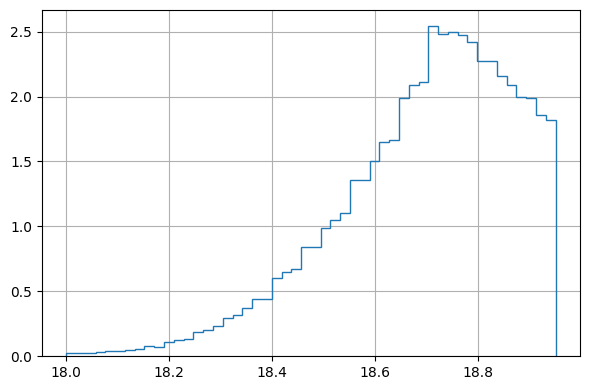

In [19]:
with h5.File(pr_h5,'r') as hf:
    #ee = 18+np.log10( hf['mc_params'][:,3] )
    ee = 18+np.log10( hf['reco_rubtsov'][:,-1] )

fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(6, 4) )
plt.grid(True)
axs.hist( ee[pass_evs_pr[pr_h5]], 50, density=True, histtype='step',
                               log=False )

plt.show()

In [14]:
print(np.sum(pass_evs_pr[pr_h5]))

149941


In [15]:
with h5.File(ga_h5,'r') as hf:
    if use_E_rubtsov:
        log_es = 18+np.log10( hf['reco_rubtsov'][:,-1] )
    else:
        log_es = 18+np.log10( hf['mc_params'][:,3] )
    idxs_en_bins = np.digitize(log_es, edjs)
    probs_keep = np.array( [keep_ga[i-1] if i<=n_bins else 0. for i in idxs_en_bins] )
    rand = np.random.uniform( size=pass_evs_ga.shape[0] )
    pass_evs_ga = np.logical_and( probs_keep>=rand, pass_evs_ga )
    # make mask for hits
    ev_starts = hf['ev_starts'][:]
    ev_lens = np.diff( ev_starts )
    pass_hits_ga = np.repeat( pass_evs_ga, ev_lens )

In [16]:
print(np.sum(pass_evs_ga))

149908


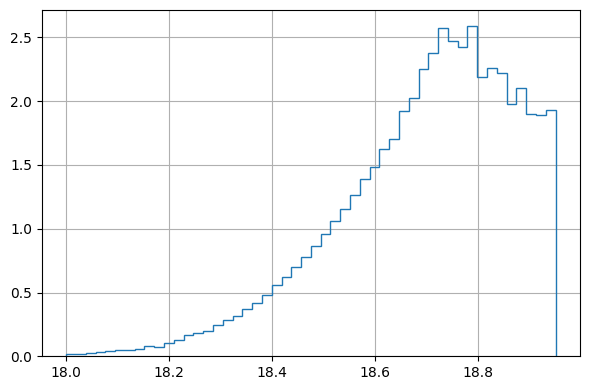

In [18]:
with h5.File(ga_h5,'r') as hf:
    ee = 18+np.log10( hf['reco_rubtsov'][:,-1] )
    #ee = 18+np.log10( hf['mc_params'][:,3] )

fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(6, 4) )
plt.grid(True)
axs.hist( ee[pass_evs_ga], 50, density=True, histtype='step',
                               log=False  )

plt.show()

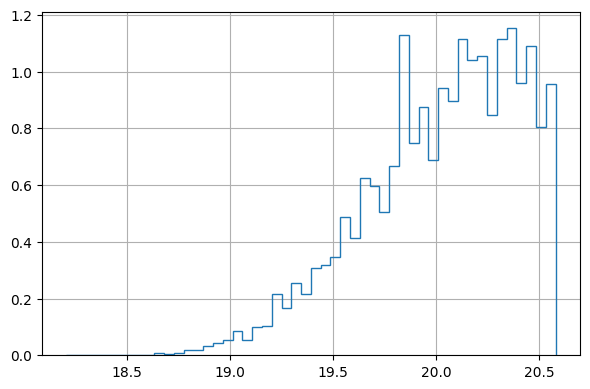

In [166]:
with h5.File(ga_h5,'r') as hf:
    ee = 18+np.log10( hf['mc_params'][:,3] )

fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(6, 4) )
plt.grid(True)
axs.hist( ee, 50, density=True, histtype='step',
                               log=False,  )

plt.show()